Visualizing 5 Random Full Slice Images:


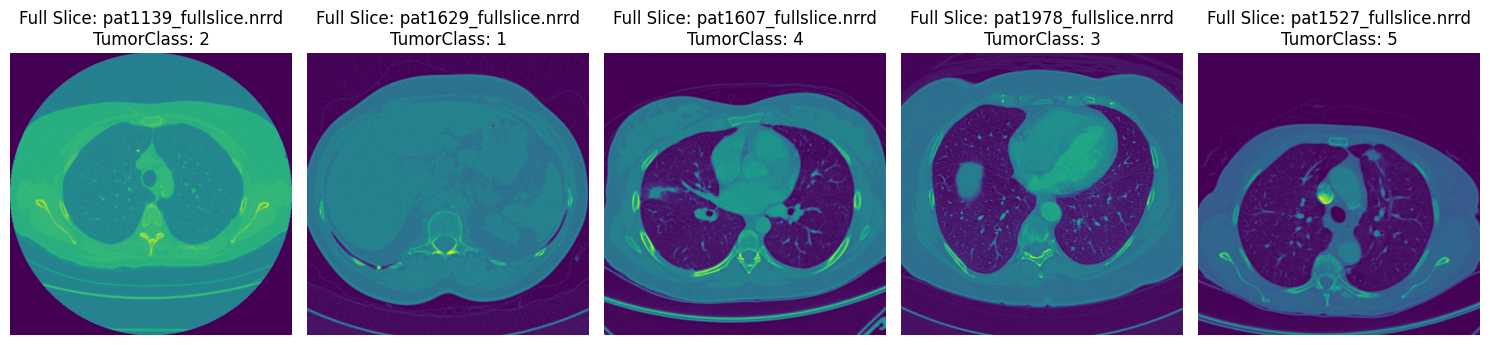

Visualizing 5 Random Nodule Images:


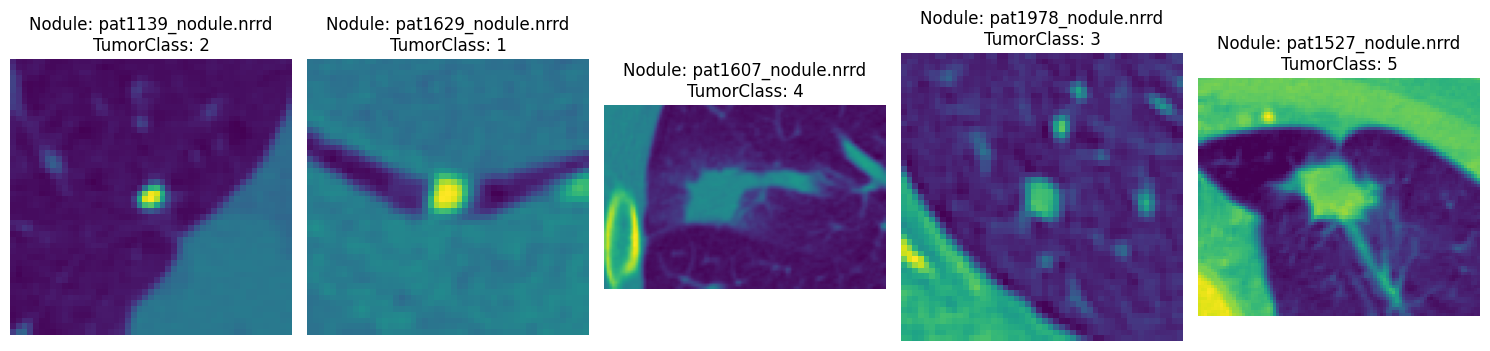

In [7]:
import nrrd
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
# Path to the folder containing .nrrd files and the .xls file
nrrd_folder = "Train"
xls_file = "dataset_lung.xlsx"

# Load the Excel file
patient_data = pd.read_excel(xls_file)

# Function to visualize a .nrrd file
def visualize_nrrd(nrrd_path, title):
    # Check if the file exists
    if not os.path.exists(nrrd_path):
        print(f"File not found: {nrrd_path}")
        return
    
    # Read the nrrd file
    data, header = nrrd.read(nrrd_path)
    
    # Check if data is 3D and extract a 2D slice
    if len(data.shape) == 3:
        middle_slice_index = data.shape[0] // 2  # Middle slice
        middle_slice = data[middle_slice_index, :, :]
    elif len(data.shape) == 2:
        middle_slice = data
    else:
        print(f"Unsupported data shape: {data.shape}")
        return
    
    # Plot the slice
    plt.imshow(middle_slice)
    plt.title(title)
    plt.axis("off")

# Function to plot 20 random images for a given column (Full_slice or Nodule)
def plot_random_images(data, image_column, title_prefix):
    # Randomly sample 20 rows
    random_sample = data.sample(n=5, random_state=42)

    # Plot the images
    plt.figure(figsize=(15, 15))
    for idx, (_, row) in enumerate(random_sample.iterrows()):
        image_file = os.path.join(nrrd_folder, row[image_column])
        plt.subplot(4, 5, idx + 1)  # 4 rows x 5 columns
        visualize_nrrd(image_file, f"{title_prefix}: {row[image_column]}\nTumorClass: {row['TumorClass']}")
    plt.tight_layout()
    plt.show()

# Plot Full_slice images
print("Visualizing 5 Random Full Slice Images:")
plot_random_images(patient_data, image_column='Full_slice', title_prefix="Full Slice")

# Plot Nodule images
print("Visualizing 5 Random Nodule Images:")
plot_random_images(patient_data, image_column='Nodule', title_prefix="Nodule")

In [2]:
'''# Image Preprocessing Function
def load_and_preprocess_images(data, image_column, target_size=(128, 128)):
    images = []
    labels = []
    for _, row in data.iterrows():
        image_path = os.path.join(nrrd_folder, row[image_column])
        if os.path.exists(image_path):
            # Read the .nrrd file
            img_data, _ = nrrd.read(image_path)
            
            # Extract middle slice if 3D
            if len(img_data.shape) == 3:
                middle_index = img_data.shape[0] // 2
                img = img_data[middle_index, :, :]
            elif len(img_data.shape) == 2:
                img = img_data
            else:
                continue  # Skip unsupported shapes
            
            # Add channel dimension to ensure (H, W, 1)
            img = np.expand_dims(img, axis=-1)  # Add grayscale channel
            
            # Resize and normalize image
            img_resized = tf.image.resize(img, target_size).numpy()
            img_normalized = img_resized / 255.0  # Normalize to [0, 1]
            
            images.append(img_normalized)
            labels.append(row['TumorClass'])
    return np.array(images), np.array(labels)

# Load and preprocess images for Full_slice
print("Loading Full Slice images...")
X_full, y_full = load_and_preprocess_images(patient_data, 'Full_slice')

# Load and preprocess images for Nodule (optional: combine both datasets if needed)
print("Loading Nodule images...")
X_nodule, y_nodule = load_and_preprocess_images(patient_data, 'Nodule')

# Combine datasets (optional: to include both Full_slice and Nodule)
X = np.concatenate((X_full, X_nodule), axis=0)
y = np.concatenate((y_full, y_nodule), axis=0)

# Encode labels to categorical
num_classes = len(np.unique(y))
y_encoded = to_categorical(y - 1, num_classes=num_classes)  # TumorClass starts from 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
print("Training the model...")
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=16)

# Evaluate the model
print("Evaluating the model...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()
'''

'# Image Preprocessing Function\ndef load_and_preprocess_images(data, image_column, target_size=(128, 128)):\n    images = []\n    labels = []\n    for _, row in data.iterrows():\n        image_path = os.path.join(nrrd_folder, row[image_column])\n        if os.path.exists(image_path):\n            # Read the .nrrd file\n            img_data, _ = nrrd.read(image_path)\n            \n            # Extract middle slice if 3D\n            if len(img_data.shape) == 3:\n                middle_index = img_data.shape[0] // 2\n                img = img_data[middle_index, :, :]\n            elif len(img_data.shape) == 2:\n                img = img_data\n            else:\n                continue  # Skip unsupported shapes\n            \n            # Add channel dimension to ensure (H, W, 1)\n            img = np.expand_dims(img, axis=-1)  # Add grayscale channel\n            \n            # Resize and normalize image\n            img_resized = tf.image.resize(img, target_size).numpy()\n       

In [4]:
def load_and_preprocess_images_with_bbox(data, image_column, bbox_columns, target_size=(128, 128)):
    images = []
    bboxes = []
    for _, row in data.iterrows():
        image_path = os.path.join(nrrd_folder, row[image_column])
        if os.path.exists(image_path):
            # Read the .nrrd file
            img_data, _ = nrrd.read(image_path)

            # Extract middle slice if 3D
            if len(img_data.shape) == 3:
                middle_index = img_data.shape[0] // 2
                img = img_data[middle_index, :, :]
            elif len(img_data.shape) == 2:
                img = img_data
            else:
                continue  # Skip unsupported shapes

            # Add channel dimension and resize
            img = np.expand_dims(img, axis=-1)  # Add grayscale channel
            img_resized = tf.image.resize(img, target_size).numpy()
            img_normalized = img_resized / 255.0  # Normalize to [0, 1]

            # Append image and bounding box
            images.append(img_normalized)
            bbox = [row[col] for col in bbox_columns]  # (x, y, width, height)
            bboxes.append(bbox)

    return np.array(images), np.array(bboxes)


In [5]:
# Bounding box columns
bbox_columns = ['x', 'y', 'width', 'height']

# Load Full_slice images with bounding boxes
X, y_bboxes = load_and_preprocess_images_with_bbox(patient_data, 'Full_slice', bbox_columns)

print("Image shape:", X.shape)       # (num_samples, 128, 128, 1)
print("Bounding box shape:", y_bboxes.shape)  # (num_samples, 4)


I0000 00:00:1734368850.534340   26401 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


KeyError: 'x'